In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris

In [2]:
iris_dataset = load_iris()

In [3]:
df = pd.DataFrame(data = np.c_[iris_dataset['data'], iris_dataset['target']], 
                  columns = iris_dataset["feature_names"] + ["target"])

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1:]

### Identify Outliers using Tukey BoxPlots

[]

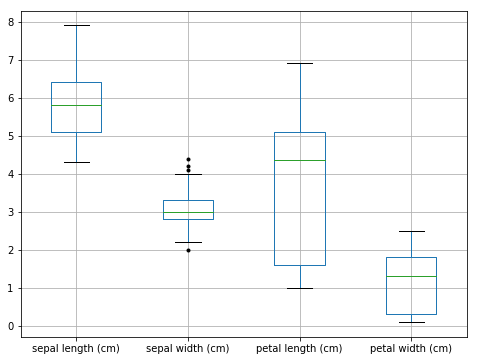

In [6]:
plt.subplots(figsize=(8,6))
X.boxplot(sym="k.")
plt.plot()

### Outlier! Sepal width contains outliers!
### Removing the Outlier by replacing with median value:

In [7]:
outlier = X["sepal width (cm)"] > 4
outlier2 = X["sepal width (cm)"] < 2.05

median = X["sepal width (cm)"].median()


In [8]:
X.loc[X["sepal width (cm)"] > 4, "sepal width (cm)"] = median
X.loc[X["sepal width (cm)"] < 2.05, "sepal width (cm)"] = median

C:\Users\DIU\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\DIU\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\DIU\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[]

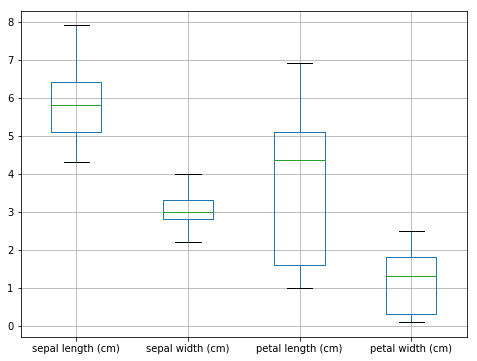

In [9]:
plt.subplots(figsize=(8,6))
X.boxplot(sym="k.")
plt.plot()

### Another way to Detect and remove Outlier:

In [10]:
data = pd.DataFrame(data =iris_dataset.data, columns = ["A", "B", "C", "D"])

In [11]:
# detecting Outlier
# Inter Quartile Range is the distance between the 3rd Quartile and the first Qartile

minimum = 0
maximum = 0

def detect_outlier(feature):
    first_q = np.percentile(feature, 25)
    third_q = np.percentile(feature, 75) 
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR 
    maximum = third_q + IQR
    flag = False
    
    if(minimum > np.min(feature)):
        flag = True
    if(maximum < np.max(feature)):
        flag = True
        
    if(flag):
        print("Outlier exist")
    else:
        print("NO outlier exist")
        

In [12]:
def remove_outlier(feature):
    first_q = np.percentile(data[feature], 25)
    third_q = np.percentile(data[feature], 75) 
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR 
    maximum = third_q + IQR
    
    mean = data[feature].median()
    
    data.loc[data[feature] < minimum, feature] = mean
    data.loc[data[feature] > maximum, feature] = mean

In [13]:
for i in range(len(data.columns)):
    detect_outlier(data[data.columns[i]])


NO outlier exist
Outlier exist
NO outlier exist
NO outlier exist


In [14]:
remove_outlier("B")

In [16]:
for i in range(len(data.columns)):
    detect_outlier(data[data.columns[i]])

NO outlier exist
NO outlier exist
NO outlier exist
NO outlier exist


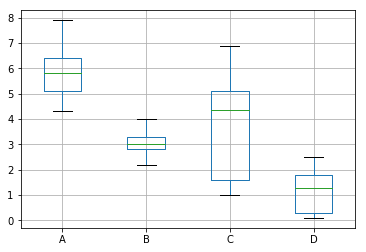

In [17]:
data.boxplot()
plt.show()